In [15]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.api as sm

data_dir = Path('../data').resolve()
data_dir.exists()

True

In [2]:
df = pd.read_csv(data_dir/'train.csv', index_col='Id')

# data section of interest
df = df[df['MSZoning'] == 'RL']
df = df[df['SaleCondition'] == 'Normal']

# target normalization
df['SalePrice'] = df['SalePrice'].apply(np.log)

# input variables
input_variables = ['OverallQual', 'YearBuilt', 'TotRmsAbvGrd', 'GarageCars']
df = df[input_variables + ['SalePrice', ]]

df.head()

,OverallQual,YearBuilt,TotRmsAbvGrd,GarageCars,SalePrice
Id,,,,,
1,7,2003,8,2,12.247694
2,6,1976,6,2,12.109011
3,7,2001,6,2,12.317167
5,8,2000,9,3,12.429216
6,5,1993,5,2,11.870600


In [3]:
alpha = .05

# Ordinary Least Squares fitting

In [46]:
Y = df['SalePrice']
X = sm.add_constant(df[input_variables])

model = sm.OLS(Y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     868.5
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          1.72e-315
Time:                        20:00:32   Log-Likelihood:                 386.56
No. Observations:                 955   AIC:                            -763.1
Df Residuals:                     950   BIC:                            -738.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.7358      0.537     16.275      0.000       7.682       9.789
OverallQual      0.1512      0.006     26.287      0.000       0.140       0.162
YearBuilt        0.0010      0.000      3.390      0.001       0.000       0.001
TotRmsAbvGrd     0.0521      0.004     13.155      0.000       0.044       0.060
GarageCars       0.1073      0.010     10.618      0.000       0.087       0.127
==============================================================================
Omnibus:                       32.765   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.998
Skew:                           0.245   Prob(JB):                     1.54e-13
Kurtosis:                       4.115   Cond. No.                     2.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$
\log \texttt{SalePrice} \approx 8.7358 + 0.1512 *\texttt{OverallQual} + 0.0010 *\texttt{YearBuilt} + 0.0521 *\texttt{TotRmsAbvGrd} + 0.1073 *\texttt{GarageCars}
$$

In [44]:
results.fvalue

868.4713646565384

In [45]:
results.f_pvalue

1.716881943e-315

We have $F=868.47$ with $p\approx 0 < \alpha$, therefore, we negate the null hypothesis that the model is useless.

In [54]:
results.pvalues

const            1.014317e-52
OverallQual     6.895580e-115
YearBuilt        7.277522e-04
TotRmsAbvGrd     1.983410e-36
GarageCars       5.789907e-25
dtype: float64

As all the $p$ values for the input variables are smaller than $\alpha$, we can deny the null hypothesis for each and all of the coefficients.

## Normalized residuals

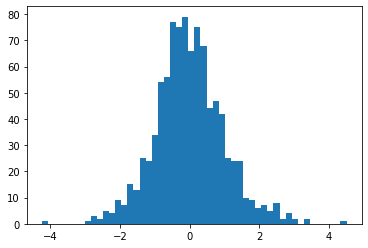

In [86]:
plt.hist(results.resid_pearson, bins=50)
plt.show()

Residuals seem to be normally distributed.

In [90]:
pd.Series(results.resid_pearson).describe()

count    9.550000e+02
mean     9.681137e-13
std      9.979014e-01
min     -4.232648e+00
25%     -6.000523e-01
50%     -4.948335e-02
75%      5.886349e-01
max      4.505062e+00
dtype: float64

Pretty symmetric.

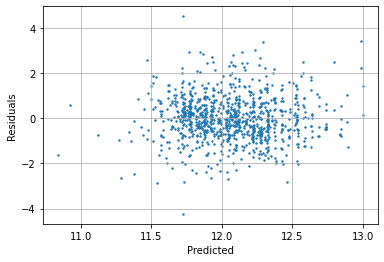

In [91]:
plt.scatter(results.fittedvalues, results.resid_pearson, s=2)
plt.grid()

plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.show()

No apparent patterns.

In [93]:
(results.resid > 0).sum()

456

In [94]:
(results.resid < 0).sum()

499

A little bit more negative residuals than positive.

In [100]:
np.sum(np.abs(results.resid_pearson) > 3) / results.nobs

0.005235602094240838

Almost all (99.5%) residuals inside [-3,3] intervals.